In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Pack the latitudes and longitudes as pairs by zipping them
lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Unzip the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

45.03313323351961 -111.04142959712287
79.73888275059417 -116.74947049865489
-69.29560239357525 -136.73878911766246
-87.20178957164342 -15.07385505442653
-56.27613434904436 -149.68809282273696
5.374902766592129 -48.70212580650764
-51.41867628940024 -105.55969200239144
6.529920263259797 113.98718379023359
19.43450662049655 145.86155448238355
60.6591531301265 172.8054606309109
-84.36474608696659 120.69199175453525
-9.182269170115816 -3.019172382425836
67.38030307230002 61.66431118037204
-48.39756529226819 -91.81581072453733
-71.67852965335433 77.29345161043125
14.187224222466824 131.05037356131515
81.90342217153108 21.21340430904405
-62.27541547261238 -142.03327427651305
-22.468987569682128 30.331682754063394
65.40827926102145 173.87701026113382
61.94133697320228 102.32547527676189
-24.184783734902183 32.2292707293351
-52.5780920214362 58.156904405311224
-26.77581363535446 -88.2125542709905
-63.89399180323843 130.4077349413509
-4.3496310773403195 -18.139980783176526
72.51437813169744 -152

87.21434706685898 -30.300494026495386
-81.53679284251045 170.39956285901724
-65.97844429772363 65.07555428202315
-81.2458643214982 2.101383972699523
-64.83685434318318 108.73077922627817
-79.30886865390984 108.34770145977552
-6.644215550084084 96.0875720266551
-15.181387327374026 31.191985410035358
-22.58195269188893 136.35319672358287
83.50202804405262 -24.455899997552535
61.42373260511289 105.61061533011701
-0.5556000551565177 82.55583733676167
62.176986450814354 176.9385172464439
45.82065237298076 -61.21025130739102
-74.03331094161427 -87.98367310057077
24.88369471577539 -136.32907917113144
-54.66872567028371 110.73893997326036
52.296327062731365 -71.43042153127729
-0.7666868824482833 -49.130372039749886
59.5682762637002 160.8122154199973
33.293770766350974 -65.10456174646939
4.121667540345143 -16.24022641901874
-47.957532837692796 109.25067786171991
-56.47135514648347 167.52969408565616
3.05234383971181 -179.44339447216416
-1.9506635003659767 128.94680887936988
-67.03680470664372 -

57.472631057399724 133.97514053493637
32.07435962635654 1.226487291522659
-17.442392344250052 127.527624726152
-67.20171355480956 97.1216985806679
67.28196945657314 -135.28684536796155
77.80356663503795 1.9257946413688956
-83.89009580330962 -128.2059719587108
-59.65048220086999 165.1888277971413
-7.047278156690481 -26.96144842331546
0.11570002325117912 103.38852916551792
55.17972848600289 37.38740458726488
23.53664110672318 36.70161877463033
50.87548070397759 -115.82593019893712
25.600134070307746 116.74983180390967
6.3653719793257295 -156.0725578122921
71.63226046359085 179.4287803510719
50.1951634080919 -58.46493644801872
28.827982105886733 -31.1209144592263
-47.57428748713342 110.36474045661043
-88.04009873113802 -8.672224754582686
41.413878900816655 -25.499817615527746
-25.122275628991815 58.472528443196836
58.613086351662986 -111.41370302153821
-13.400532106622904 -46.171565262663364
-60.845806131042586 -130.0823317286849
-16.052139735501612 19.76411703404719
-74.70562698320947 27

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

641

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
  
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bozeman
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | saint-georges
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | labuan
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | verkhnyaya inta
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | san policarpo
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | messina
Processing Record 18 of Set 1 | vanavara
Processing Record 19 of Set 1 | chokwe
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | coquimbo
Processing Record 22 of Set 1 | georgetown
Pro

Processing Record 38 of Set 4 | tuktoyaktuk
Processing Record 39 of Set 4 | tilichiki
Processing Record 40 of Set 4 | thompson
Processing Record 41 of Set 4 | port hedland
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | sao francisco
Processing Record 44 of Set 4 | saint-joseph
Processing Record 45 of Set 4 | beringovskiy
Processing Record 46 of Set 4 | moindou
Processing Record 47 of Set 4 | tasiilaq
Processing Record 48 of Set 4 | port blair
Processing Record 49 of Set 4 | sorland
Processing Record 50 of Set 4 | zhigansk
Processing Record 1 of Set 5 | tura
Processing Record 2 of Set 5 | kupang
Processing Record 3 of Set 5 | lasa
Processing Record 4 of Set 5 | faanui
Processing Record 5 of Set 5 | mount pleasant
Processing Record 6 of Set 5 | uyemskiy
Processing Record 7 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 8 of Set 5 | niquero
Processing Record 9 of Set 5 | marrakesh
Processing Record 10 of Set 5 | gonen
Processing Record 11 of Set

Processing Record 27 of Set 8 | victoria
Processing Record 28 of Set 8 | bargal
City not found. Skipping...
Processing Record 29 of Set 8 | zhangye
Processing Record 30 of Set 8 | naze
Processing Record 31 of Set 8 | koslan
Processing Record 32 of Set 8 | baracoa
Processing Record 33 of Set 8 | mporokoso
Processing Record 34 of Set 8 | kaeo
Processing Record 35 of Set 8 | boyolangu
Processing Record 36 of Set 8 | porto de moz
Processing Record 37 of Set 8 | longhua
Processing Record 38 of Set 8 | acapulco
Processing Record 39 of Set 8 | mozarlandia
Processing Record 40 of Set 8 | alamos
Processing Record 41 of Set 8 | poum
Processing Record 42 of Set 8 | nome
Processing Record 43 of Set 8 | auki
Processing Record 44 of Set 8 | vestmannaeyjar
Processing Record 45 of Set 8 | kaitangata
Processing Record 46 of Set 8 | loiza
Processing Record 47 of Set 8 | saint-pierre
Processing Record 48 of Set 8 | khandyga
Processing Record 49 of Set 8 | misratah
Processing Record 50 of Set 8 | palabuha

Processing Record 14 of Set 12 | mizoch
Processing Record 15 of Set 12 | la cruz
Processing Record 16 of Set 12 | upington
Processing Record 17 of Set 12 | belyy yar
Processing Record 18 of Set 12 | moose factory
Processing Record 19 of Set 12 | eldikan
City not found. Skipping...
Processing Record 20 of Set 12 | sao joao de pirabas
Processing Record 21 of Set 12 | namikupa
Processing Record 22 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 23 of Set 12 | saint anthony
Processing Record 24 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 25 of Set 12 | villefranche-sur-saone
Processing Record 26 of Set 12 | ust-kulom
Processing Record 27 of Set 12 | pakxan
Processing Record 28 of Set 12 | christchurch
Processing Record 29 of Set 12 | hereford
Processing Record 30 of Set 12 | sandwick
Processing Record 31 of Set 12 | ponong
Processing Record 32 of Set 12 | muncar
Processing Record 33 of Set 12 | laiwu
Processing Record 34 of Set 12 | garmsar
Proce

In [11]:
len(city_data)

588

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bozeman,45.6796,-111.0386,45.09,51,100,10.36,US,2022-10-25 20:12:00
1,Yellowknife,62.4560,-114.3525,23.56,85,99,10.00,CA,2022-10-25 20:15:18
2,Rikitea,-23.1203,-134.9692,72.97,73,57,18.34,PF,2022-10-25 20:16:21
3,Ushuaia,-54.8000,-68.3000,49.62,46,0,4.61,AR,2022-10-25 20:14:29
4,Mataura,-46.1927,168.8643,47.48,69,100,3.13,NZ,2022-10-25 20:16:21
5,Saint-Georges,12.0564,-61.7485,83.28,74,100,8.05,GD,2022-10-25 20:11:55
6,Castro,-24.7911,-50.0119,72.82,64,0,6.15,BR,2022-10-25 20:16:22
7,Labuan,5.2767,115.2417,80.40,78,100,13.60,MY,2022-10-25 20:14:22
8,Airai,-8.9266,125.4092,61.63,93,100,0.83,TL,2022-10-25 20:16:22
9,Anadyr,64.7500,177.4833,5.50,92,75,2.24,RU,2022-10-25 20:16:23


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bozeman,US,2022-10-25 20:12:00,45.6796,-111.0386,45.09,51,100,10.36
1,Yellowknife,CA,2022-10-25 20:15:18,62.4560,-114.3525,23.56,85,99,10.00
2,Rikitea,PF,2022-10-25 20:16:21,-23.1203,-134.9692,72.97,73,57,18.34
3,Ushuaia,AR,2022-10-25 20:14:29,-54.8000,-68.3000,49.62,46,0,4.61
4,Mataura,NZ,2022-10-25 20:16:21,-46.1927,168.8643,47.48,69,100,3.13


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1666730003.3441122

In [17]:
today = time.strftime("%x")
today

'10/25/22'

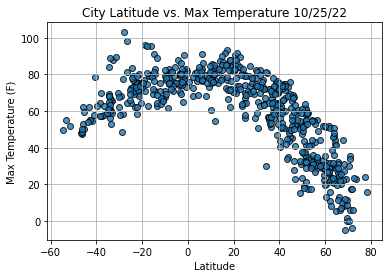

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

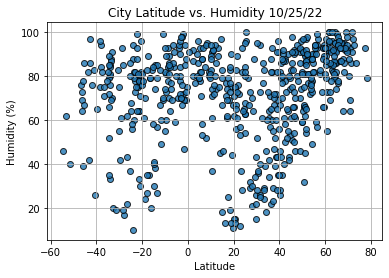

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

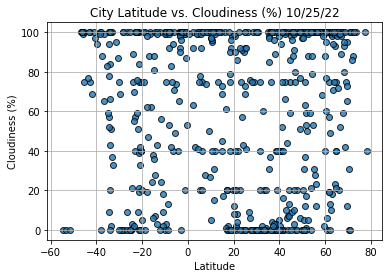

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

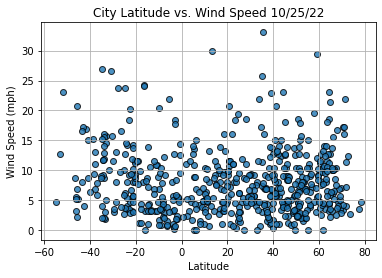

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2022-10-25 20:16:25
Lat                        -33.65
Lng                      115.3333
Max Temp                    52.79
Humidity                       88
Cloudiness                     51
Wind Speed                   1.88
Name: 13, dtype: object

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bozeman,US,2022-10-25 20:12:00,45.6796,-111.0386,45.09,51,100,10.36
1,Yellowknife,CA,2022-10-25 20:15:18,62.4560,-114.3525,23.56,85,99,10.00
5,Saint-Georges,GD,2022-10-25 20:11:55,12.0564,-61.7485,83.28,74,100,8.05
7,Labuan,MY,2022-10-25 20:14:22,5.2767,115.2417,80.40,78,100,13.60
9,Anadyr,RU,2022-10-25 20:16:23,64.7500,177.4833,5.50,92,75,2.24


In [53]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [54]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


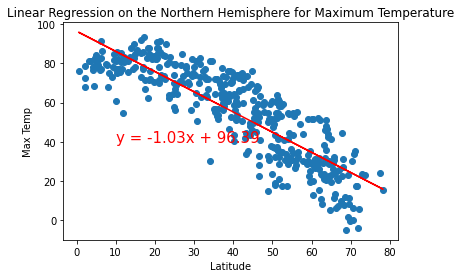

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

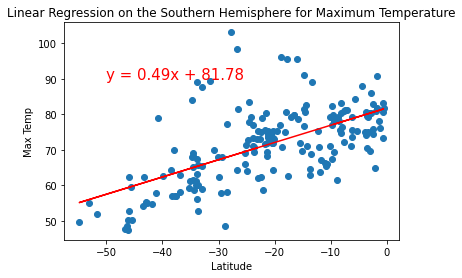

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

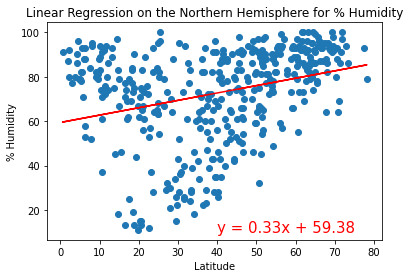

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

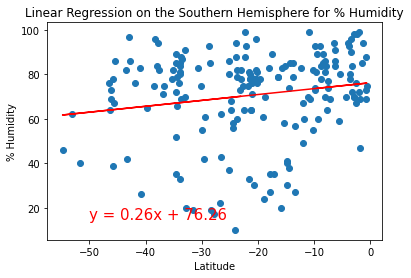

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

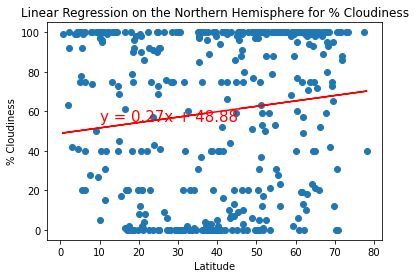

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,55))

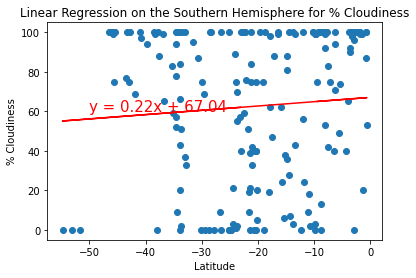

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

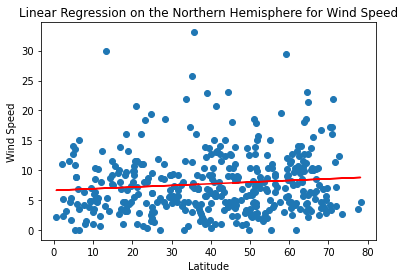

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

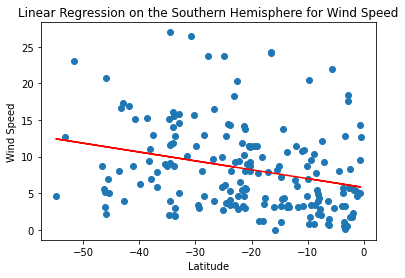

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))